## Loan Status Prediction
#### Predict the loan to be approved or to be rejected for an applicant.

######In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
######The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…

######Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

##Goal:
In this project, we are going to classify an individual whether he/she can get the loan amount based on his/her Income, Education, Working Experience, Loan taken previously, and many more factors.
Let’s get more into it by looking at the data.

### Importing the Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set

import warnings
warnings.filterwarnings('ignore')

In [3]:
### LOAD THE DATA SET ###

loan_data = pd.read_csv("C:/Users/Hi/Downloads/loan_data.csv")

In [4]:
### read the data set

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


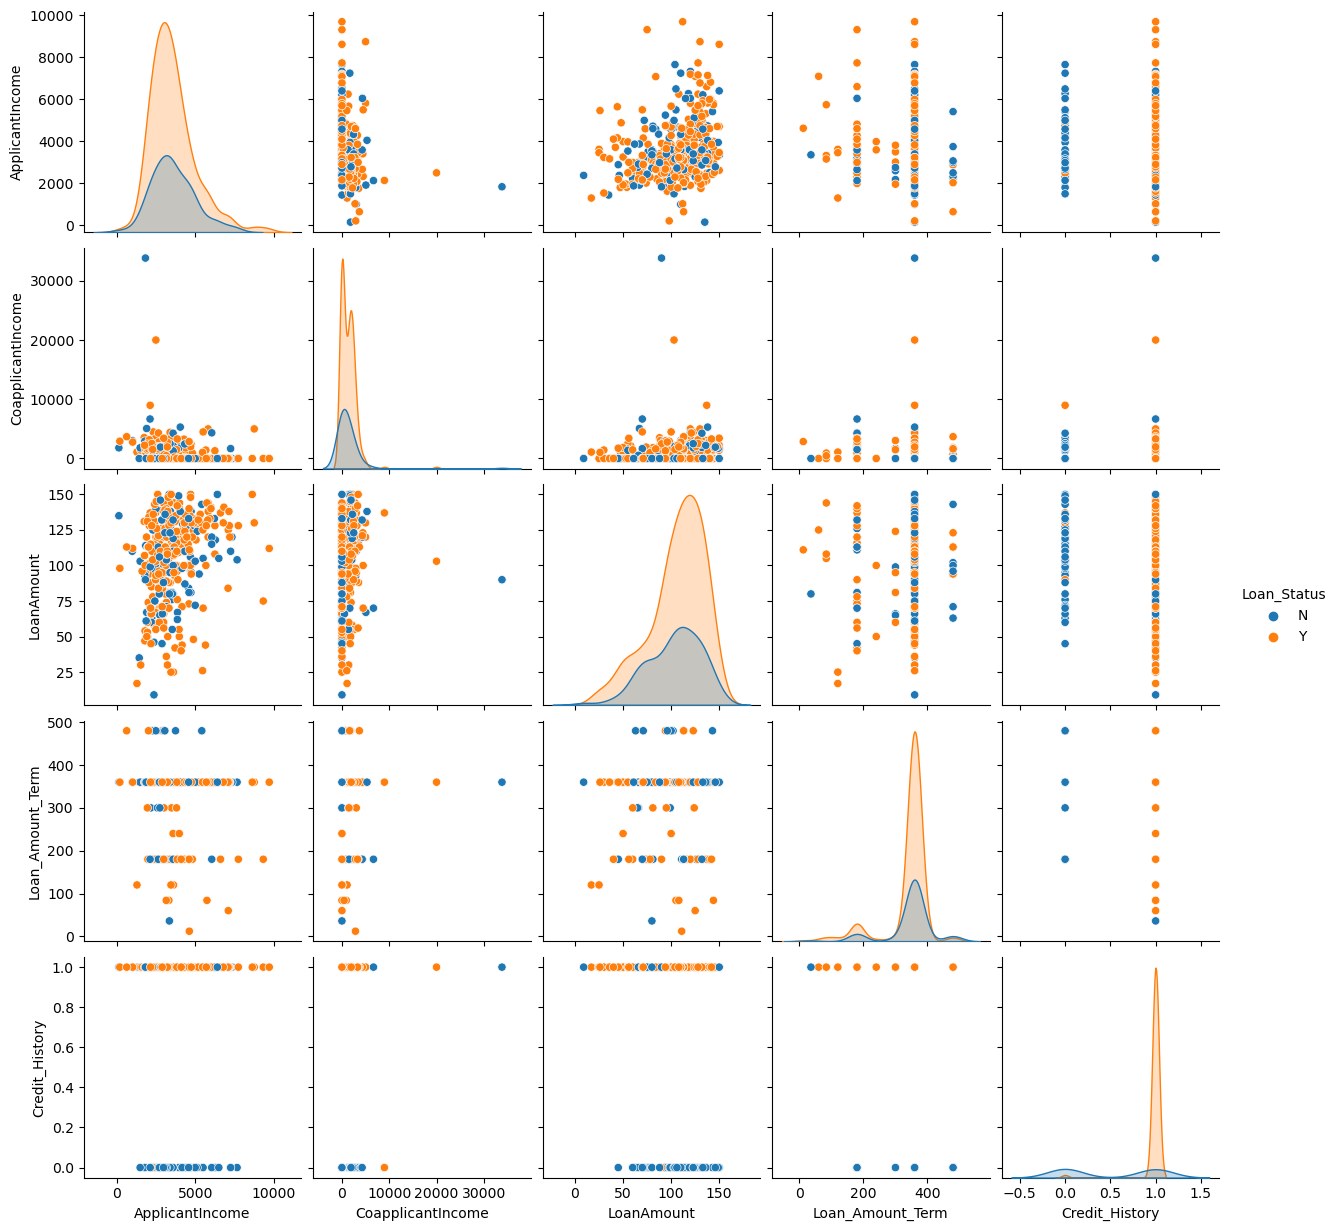

In [5]:
sns.pairplot(loan_data,hue='Loan_Status')

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
# label encoding
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [8]:
loan_data['Gender'].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [9]:
loan_data['Married'].value_counts()

Yes    228
No     153
Name: Married, dtype: int64

In [10]:
loan_data['Self_Employed'].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [11]:
loan_data['Property_Area'].value_counts()

Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64

In [12]:
loan_data['Loan_Status'].value_counts()

1    271
0    110
Name: Loan_Status, dtype: int64

In [13]:
loan_data['Loan_Status'].value_counts(normalize = True)#### immbalance

1    0.711286
0    0.288714
Name: Loan_Status, dtype: float64

In [14]:
# convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [15]:
loan_data['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [16]:
# replacing the value of 3+ to 4
loan_data = loan_data.replace(to_replace='3+', value=4)

In [17]:
### Loan ID doesn't effect the Loan status,drop Loan ID column
loan_data1=loan_data.drop('Loan_ID',axis=1)

In [18]:
# number of missing values in each column
loan_data1.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

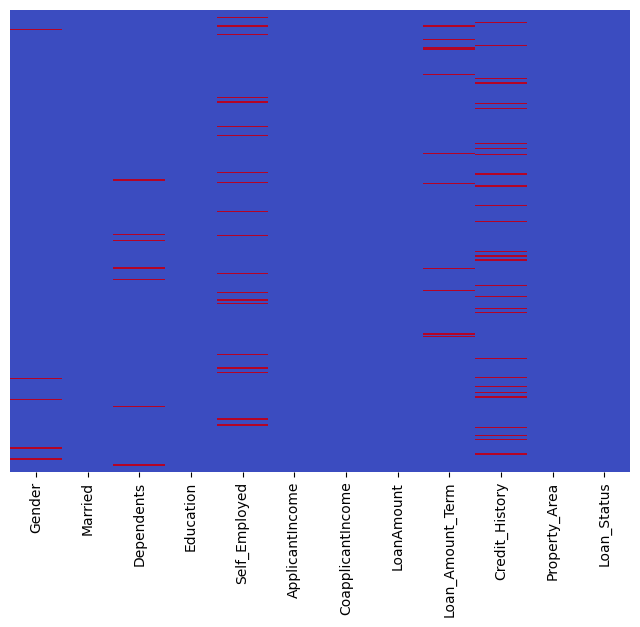

In [112]:
### Let's visually inspect the missing value in our data

plt.figure(figsize = (8,6))
sns.heatmap(loan_data1.isnull(),cbar=False,cmap = 'coolwarm',yticklabels=False)
plt.show()

In [20]:
loan_data1.size

4572

In [21]:
loan_data1.isnull().sum().sum()

75

<function matplotlib.pyplot.show(close=None, block=None)>

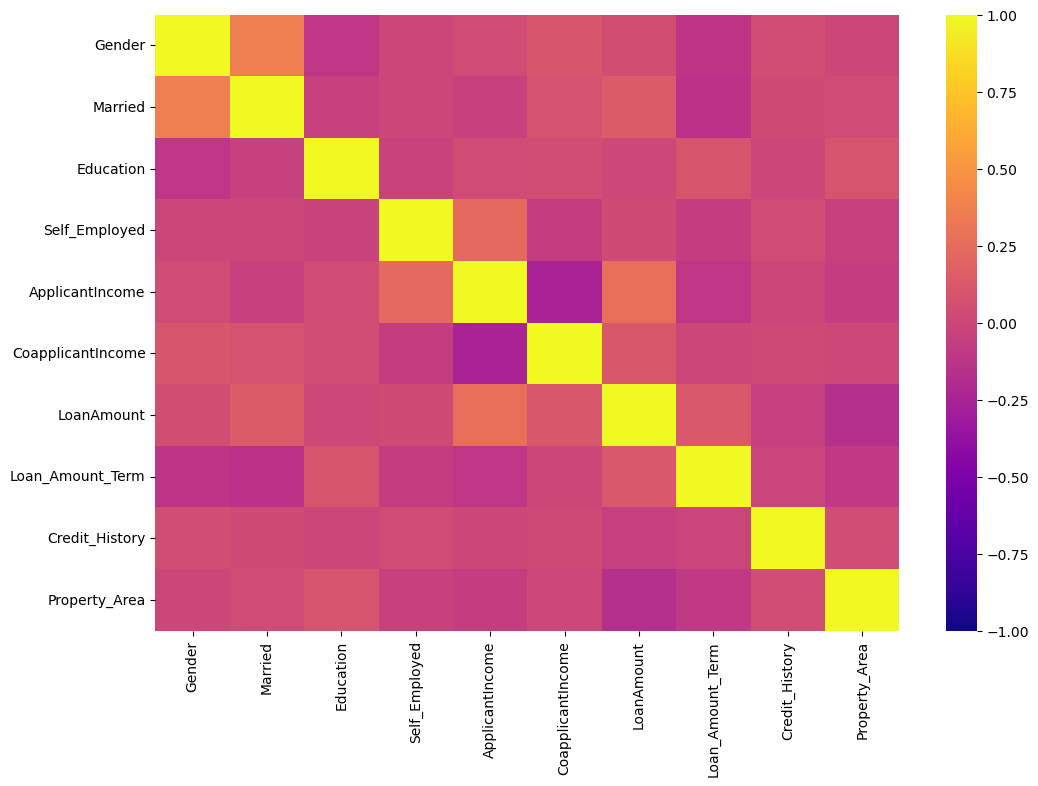

In [22]:
## Inspect possible correlation between independent variables
plt.figure(figsize = (12,8))

cor_matrix = loan_data1.drop('Loan_Status',axis=1).corr()
sns.heatmap(cor_matrix,cmap= 'plasma',vmin = -1,vmax = 1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

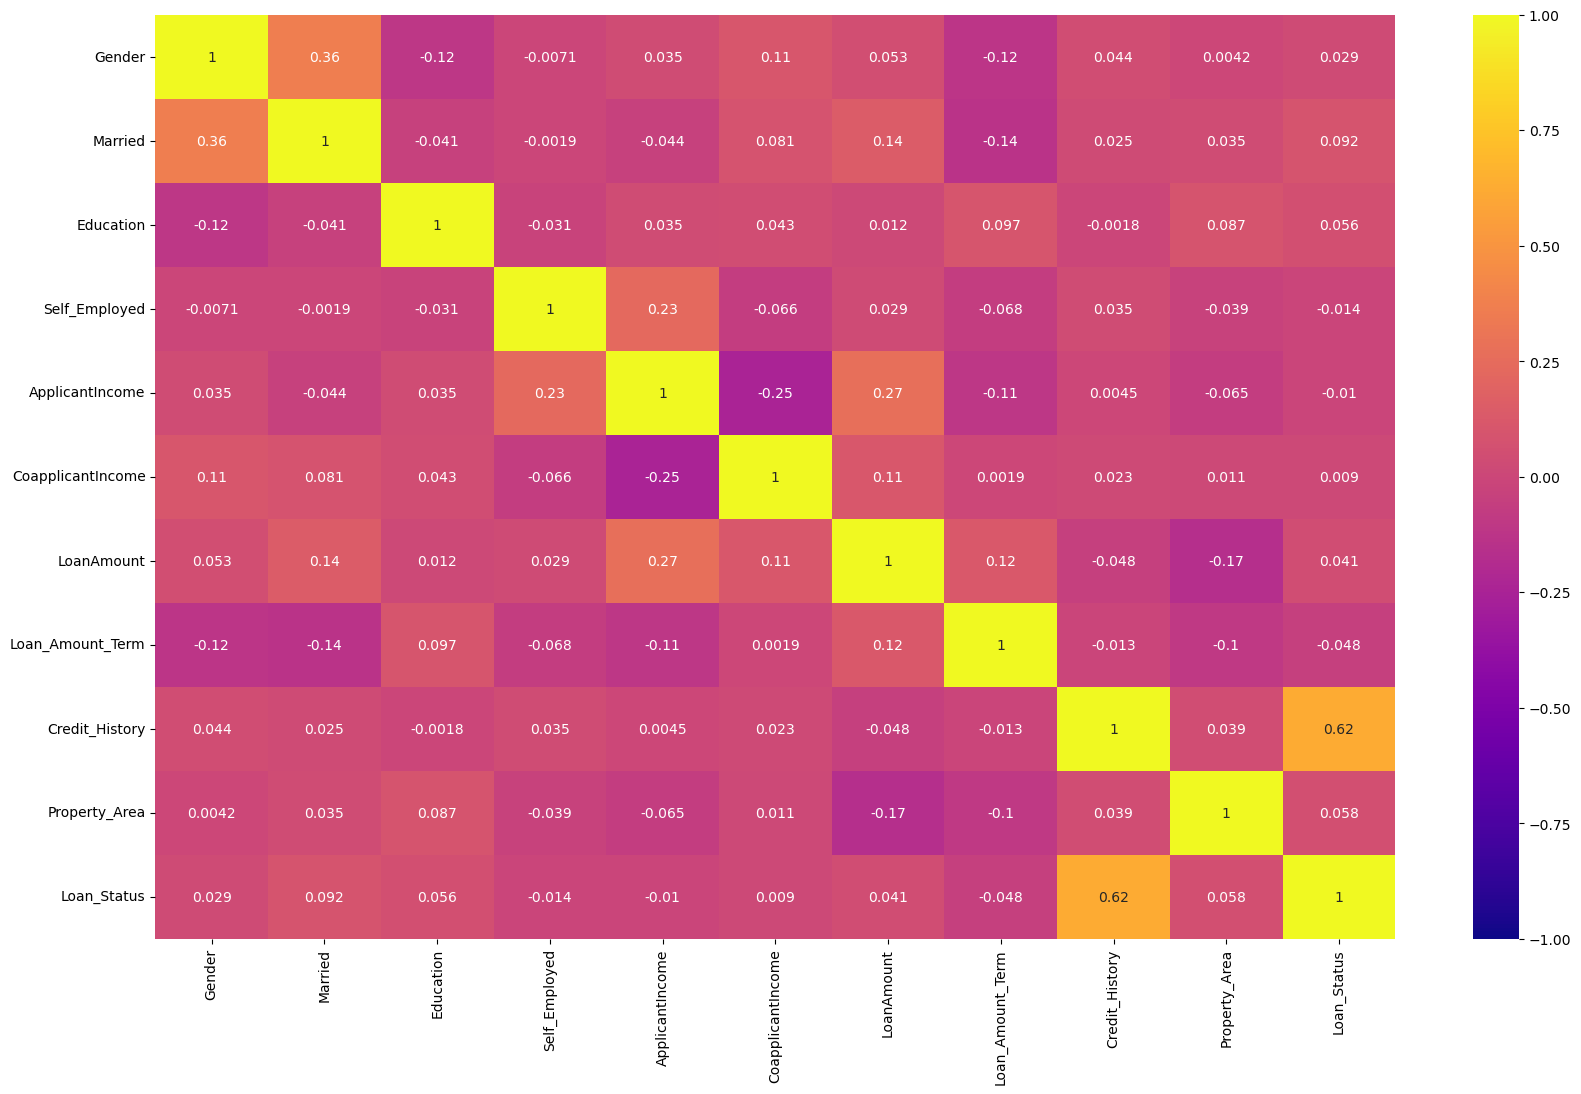

In [23]:
plt.figure(figsize = (20,12))
sns.heatmap(loan_data1.corr(),annot = True, cmap= 'plasma',vmin = -1,vmax = 1)
plt.show

### Feature selection

In [24]:
from sklearn. model_selection import train_test_split
import sklearn.metrics as metrics

In [25]:
x = loan_data1.drop('Loan_Status',axis = 1)
y = loan_data1['Loan_Status']

## outliers detection

In [26]:
## let's check the number of outliers per columns

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

In [27]:
Q1

Gender                  1.0
Married                 0.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      2600.0
CoapplicantIncome       0.0
LoanAmount             90.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           0.0
Name: 0.25, dtype: float64

In [28]:
Q3

Gender                  1.0
Married                 1.0
Education               1.0
Self_Employed           0.0
ApplicantIncome      4288.0
CoapplicantIncome    2016.0
LoanAmount            127.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           2.0
Name: 0.75, dtype: float64

In [29]:
IQR

Gender                  0.0
Married                 1.0
Education               1.0
Self_Employed           0.0
ApplicantIncome      1688.0
CoapplicantIncome    2016.0
LoanAmount             37.0
Loan_Amount_Term        0.0
Credit_History          0.0
Property_Area           2.0
dtype: float64

In [111]:
((x>UL)|x<LL).sum()

ApplicantIncome      381
CoapplicantIncome      0
Credit_History        87
Dependents             0
Education              0
Gender                90
LoanAmount           381
Loan_Amount_Term     381
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)


In [32]:
scaled_x.shape

(381, 11)

In [33]:
((scaled_x>UL)|scaled_x<LL).sum()

ApplicantIncome      381
CoapplicantIncome      0
Credit_History        30
Dependents             0
Education              0
Gender                 5
LoanAmount           381
Loan_Amount_Term     381
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [34]:
scaled_x[((scaled_x>UL)|scaled_x<LL)]=np.nan

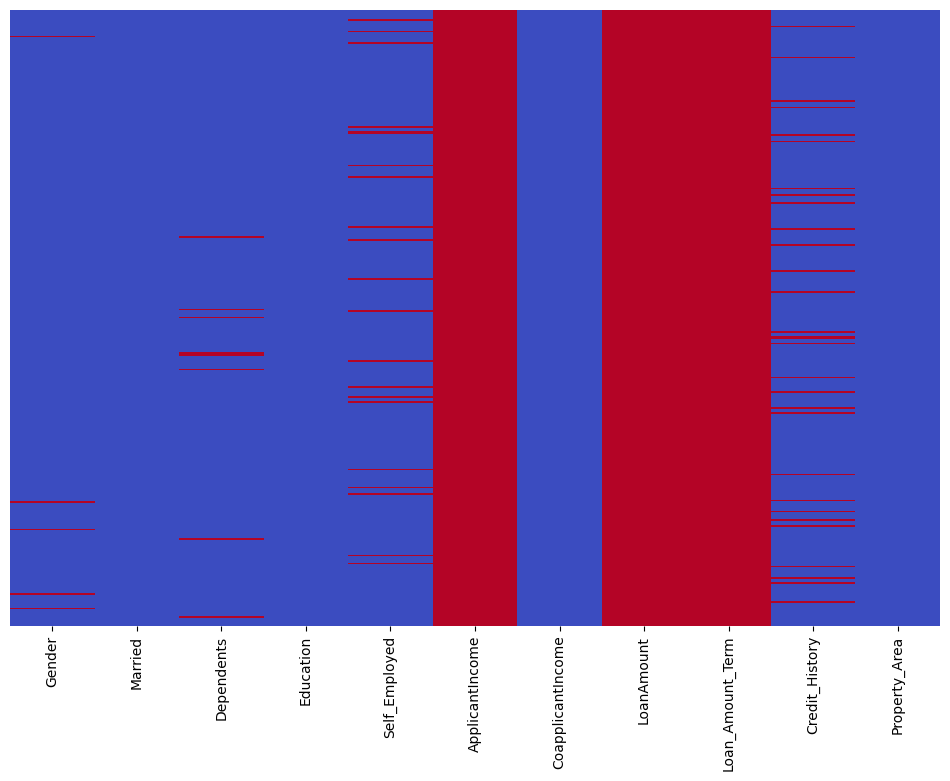

In [36]:
### Let's visually inspect the missing value in our data

plt.figure(figsize = (12,8))
sns.heatmap(scaled_x.isnull(),cbar=False,cmap = 'coolwarm',yticklabels=False)
plt.show()

In [38]:
# number of missing values in each column
scaled_x.isnull().sum()

Gender                 5
Married                0
Dependents             8
Education              0
Self_Employed         21
ApplicantIncome      381
CoapplicantIncome      0
LoanAmount           381
Loan_Amount_Term     381
Credit_History        30
Property_Area          0
dtype: int64

In [39]:
scaled_x.isnull().sum().sort_values(ascending = False)/len(scaled_x)*100

ApplicantIncome      100.000000
LoanAmount           100.000000
Loan_Amount_Term     100.000000
Credit_History         7.874016
Self_Employed          5.511811
Dependents             2.099738
Gender                 1.312336
Married                0.000000
Education              0.000000
CoapplicantIncome      0.000000
Property_Area          0.000000
dtype: float64

In [40]:
x_1 =scaled_x.drop(['ApplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [35]:
##### imputing missing value

from sklearn.impute import KNNImputer

In [46]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
x_imputed = pd.DataFrame(imputer.fit_transform(x_1),columns = x_1.columns)

In [42]:
((x_1>UL)|x_1<LL).sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       30
Dependents            0
Education             0
Gender                5
LoanAmount            0
Loan_Amount_Term      0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [47]:
x_imputed.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
dtype: int64

### splitting the data

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_imputed,y,test_size=0.25,random_state=2,stratify=y)

### Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,criterion='log_loss', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

clf.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_features=1.0)

In [50]:
train_pred = clf.predict(x_train) #### Training prediction
test_pred = clf.predict(x_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
print(confusion_matrix(y_train,train_pred))
print()
print(confusion_matrix(y_test,test_pred))

[[ 70  12]
 [  4 199]]

[[14 14]
 [11 57]]


In [54]:
print("Trainin accuracy",accuracy_score(y_train,train_pred))

print()

print("Test Accuracy",accuracy_score(y_test,test_pred))

Trainin accuracy 0.9438596491228071

Test Accuracy 0.7395833333333334


In [55]:
print(classification_report(y_train,train_pred))
print()

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        82
           1       0.94      0.98      0.96       203

    accuracy                           0.94       285
   macro avg       0.94      0.92      0.93       285
weighted avg       0.94      0.94      0.94       285


              precision    recall  f1-score   support

           0       0.56      0.50      0.53        28
           1       0.80      0.84      0.82        68

    accuracy                           0.74        96
   macro avg       0.68      0.67      0.67        96
weighted avg       0.73      0.74      0.74        96



In [89]:
### cross validation

from sklearn.model_selection import cross_val_score
training = cross_val_score(clf,x_train,y_train,cv=10)
print("All 10 accuracy", training)
print("Avg Training Acc", training.mean())
print("Max Training Acc", training.max())

All 10 accuracy [0.86206897 0.72413793 0.93103448 0.86206897 0.89655172 0.75
 0.78571429 0.85714286 0.85714286 0.85714286]
Avg Training Acc 0.8383004926108374
Max Training Acc 0.9310344827586207


### KNN MODEL

In [61]:
###### K nearest neighbors ######
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=3)

knn.fit(x_train, y_train)

KNeighborsClassifier(p=3)

In [62]:
train_pred_knn = knn.predict(x_train) #### Training prediction
test_pred_knn = knn.predict(x_test)

In [63]:
print(classification_report(y_train,train_pred_knn))
print()

print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.50      0.65        82
           1       0.83      0.98      0.90       203

    accuracy                           0.84       285
   macro avg       0.87      0.74      0.77       285
weighted avg       0.85      0.84      0.83       285


              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



### Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train,)

AdaBoostClassifier()

In [78]:
pred_train_ada = ada.predict(x_train)
pred_test_ada = ada.predict(x_test)

In [79]:
print(classification_report(y_train,pred_train_ada))
print()

print(classification_report(y_test,pred_test_ada))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        82
           1       0.86      0.98      0.92       203

    accuracy                           0.87       285
   macro avg       0.89      0.80      0.83       285
weighted avg       0.88      0.87      0.86       285


              precision    recall  f1-score   support

           0       0.67      0.43      0.52        28
           1       0.79      0.91      0.85        68

    accuracy                           0.77        96
   macro avg       0.73      0.67      0.69        96
weighted avg       0.76      0.77      0.75        96



## Gradient Boosting Algorithm

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_train)

GradientBoostingClassifier()

In [81]:
pred_train_gb = gdm.predict(x_train)
pred_test_gb = gdm.predict(x_test)

In [82]:
print(classification_report(y_train,pred_train_gb))
print()

print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        82
           1       0.91      0.98      0.95       203

    accuracy                           0.92       285
   macro avg       0.93      0.87      0.90       285
weighted avg       0.92      0.92      0.92       285


              precision    recall  f1-score   support

           0       0.65      0.46      0.54        28
           1       0.80      0.90      0.85        68

    accuracy                           0.77        96
   macro avg       0.73      0.68      0.69        96
weighted avg       0.76      0.77      0.76        96



### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, solver="newton-cg",C =0.006105402296585327)

lr.fit(x_train, y_train)

LogisticRegression(C=0.006105402296585327, max_iter=1000, solver='newton-cg')

In [75]:
pred_train_lr = lr.predict(x_train)
pred_test_lr = lr.predict(x_test)

In [76]:
print(classification_report(y_train,pred_train_lr))
print()

print(classification_report(y_test,pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        82
           1       0.72      1.00      0.84       203

    accuracy                           0.72       285
   macro avg       0.86      0.51      0.44       285
weighted avg       0.80      0.72      0.61       285


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96

